# 线性回归

## 引子
多少收入会让你感觉幸福 （视频）

## 检查数据


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# 请补充代码，从 income.data.csv读取数据；
df = 

In [3]:
# 请补充代码 ，显示前5行数据；

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


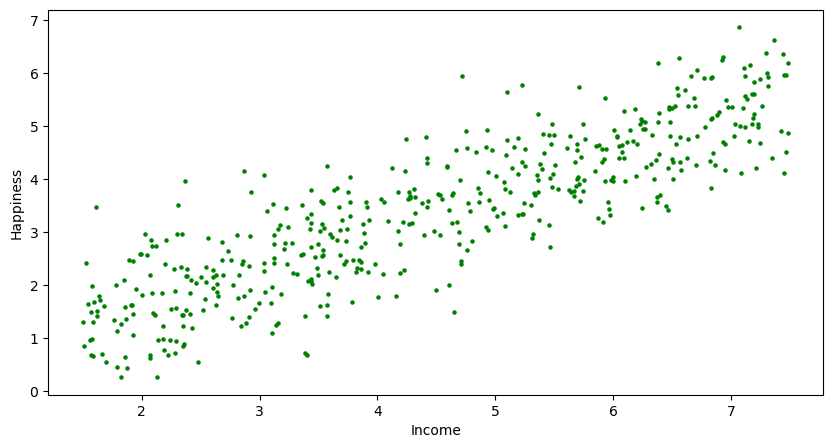

In [4]:
income = df['income']
happiness = df['happiness']
fig = plt.figure(figsize=(10,5))
plt.scatter(income, happiness, s=5,c='g')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()

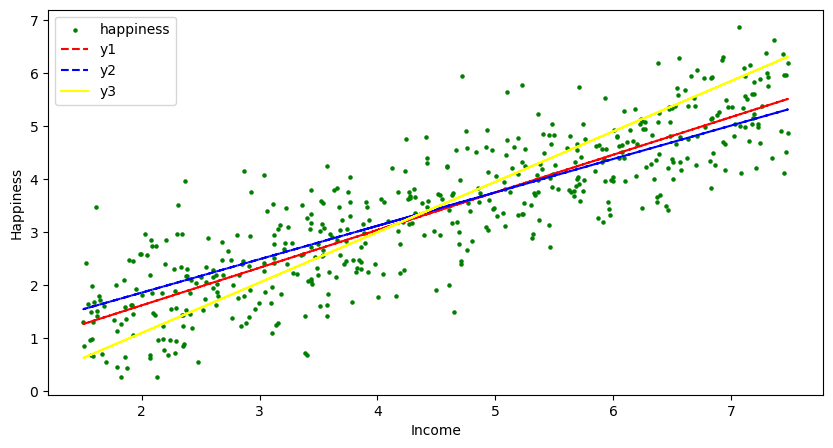

In [5]:
y1 = 0.20 + 0.71*income
y2 = 0.6 + 0.63*income
y3 = -0.8 + 0.95*income
fig = plt.figure(figsize=(10,5))
plt.scatter(income, happiness, s=5, c='g')
plt.plot(income, y1, '--r')
plt.plot(income, y2, '--b')
plt.plot(income, y3, '-', c='#ffff00')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.legend(['happiness','y1','y2','y3'])
plt.show()

# 本节课 学习目标

* 了解最小二乘准则的概念。
* 解释估计回归方程的截距和斜率。

## 1 什么是线性回归 Linear Regression

linear regression
一种统计方法，使我们能够总结和研究两个连续（定量）变量之间的关系：
* 一个变量，表示为 x，被视为预测变量、解释变量或自变量。
* 另一个变量，用 y 表示，被视为响应、结果或因变量。

由于其他术语现在使用频率较低，因此我们将使用“预测变量”和“响应”术语来指代本课程中遇到的变量。 
提及其他术语只是为了让您在其他领域遇到它们时了解它们。 
简单线性回归的形容词是“简单”，因为它只涉及一个预测变量的研究。 相比之下，我们在本课程后面研究的多元线性回归得到了形容词“多元”，因为它涉及两个或多个预测变量的研究。

在继续之前，我们必须澄清本课程中不会研究哪些类型的关系，即确定性（或函数）关系。 这是确定性关系的示例。

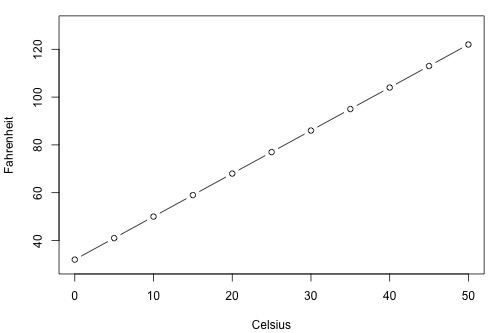

注意： 观察到的 (x, y) 数据点直接落在一条线上。 您可能还记得，华氏度和摄氏度之间的关系已知为：

Fahr = 1.8 Cels + 32

我们感兴趣的是统计关系，其中变量之间的关系并不完美。

这是统计关系的示例。 

响应变量 y 是皮肤癌死亡率（每 1000 万人的死亡人数），预测变量 x 是美国 48 个州每个州中心的纬度（北纬度）

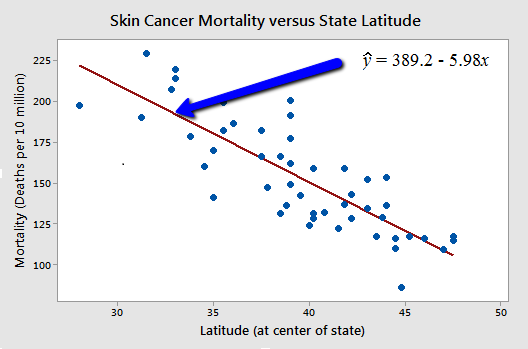

可以预计，如果生活在美国北部的高纬度地区，受到的有害阳光照射的机会就越少，因此因皮肤癌死亡的风险就越小。  
散点图支持了这样的假设。  
纬度与皮肤癌死亡率之间似乎存在负线性关系，但这种关系并不完美。  
确实，情节呈现出一些“趋势”，但也呈现出一些“分散”。   
因此，它是一种统计关系，而不是确定性关系。

统计关系的其他一些示例可能包括：

* 身高和体重——随着身高的增加，你会预期体重会增加，但并不完美。  
* 饮酒量和血液酒精含量——随着饮酒量的增加，您预计一个人的血液酒精含量会增加，但并不完美。  
* 肺活量和吸烟包年数——随着吸烟量的增加（以吸烟包年数量化），您预计肺功能（以肺活量量化）会下降，但并不完美 。  
* 行驶速度和油耗——随着行驶速度的增加，您预计油耗会减少，但并不完美。  
* 行驶速度和刹车距离——随着行驶速度的增加，刹车距离会变长。

好的，让我们研究一个响应变量 y 和一个预测变量 x 之间的统计关系！

简单线性回归用于估计两个定量变量之间的关系。 当您想知道时，可以使用简单线性回归：

* 两个变量之间的关系有多强（例如降雨量和土壤侵蚀之间的关系）。  
* 自变量一定值时的因变量值（例如，一定降雨量下的土壤侵蚀量）。  

回归模型通过将观测数据拟合成一条线来描述变量之间的关系。 线性回归模型使用直线，而逻辑回归模型和非线性回归模型使用曲线。 回归允许您估计因变量如何随着自变量的变化而变化。

## 简单线性回归的假设

简单线性回归是一种参数检验，这意味着它对数据做出某些假设。 这些假设是：

1.方差同质性（方差齐性）：我们的预测误差大小在自变量的值中不会发生显着变化。  
2.观测值的独立性：数据集中的观测值是使用统计上有效的抽样方法收集的，并且观测值之间不存在隐藏的关系。  
3.正态性：数据服从正态分布。  

线性回归做了一个额外的假设：

自变量和因变量之间的关系是线性的：通过数据点的最佳拟合线是直线（而不是曲线或某种分组因子）。

## 2 什么是最佳拟合线？

由于我们有兴趣总结两个定量变量之间的趋势，因此自然而然地出现了问题：“最佳拟合线是什么？”

看看收入和幸福指数的图，您认为哪条线（实线或虚线）最能概括收入和幸福指数之间的趋势？

为了检查两条线中哪一条更适合，我们首先需要引入一些常见的符号：  
* $y_i$ 表示实验单元 i 的观察到的响应;  
* $x_i$ 表示实验单元 i 的预测值;  
* $\hat{y}_i$ 是实验单元 i 的预测响应（或拟合值）;  
  那么，最佳拟合线的方程为：

$\hat{y}_i = b_0 + b_1 x_i$

In [6]:
income10 = income[:10]
happiness10 = happiness[:10]
y1 = 0.20 + 0.71*income10 

df = pd.DataFrame({'x_i':income10, 'y_i':happiness10, 'y_pred_i':y1}, index=range(0,10))
# 请补充代码，显示 前10行数据；



,x_i,y_i,y_pred_i
0,3.862647,2.314489,2.942480
1,4.979381,3.433490,3.735361
2,4.923957,4.599373,3.696009
3,3.214372,2.791114,2.482204
4,7.196409,5.596398,5.309451
5,3.729643,2.458556,2.848047
6,4.674517,3.192992,3.518907
7,4.498104,1.907137,3.393654
8,3.121631,2.942450,2.416358
9,4.639914,3.737942,3.494339


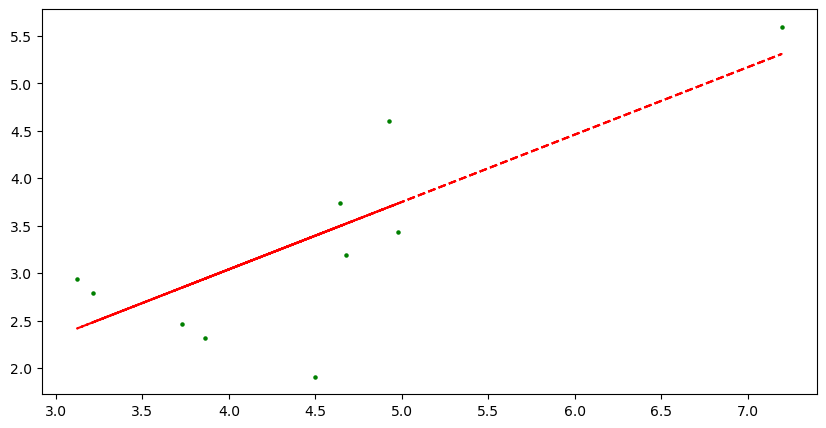

In [7]:
fig = plt.figure(figsize=(10,5))
plt.scatter(income10, happiness10, s=5, c='g')
plt.plot(income10, y1, '--r')

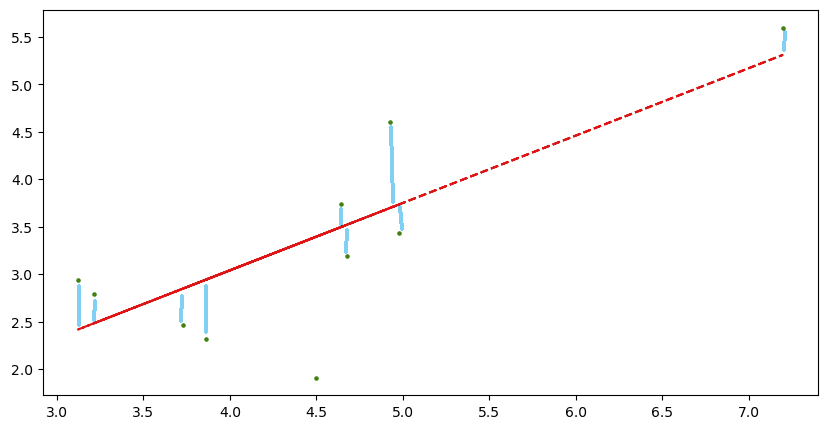

可以看到预测值无法完全匹配真实值，存在预测误差。

预测误差  $e_i = y_i- \hat{y}_i$

一条适合数据“最佳”的线将是n个预测错误（对于每个观察到的数据点）在某种程度上尽可能小的。

## 最小二乘法

实现这一目标的一种方法是“最小二乘法”，即“最小化预测错误的平方的总和”。

* 最佳拟合线的方程式： $\hat{y}_i = b_0 + b_1 x_i$

* 我们只需找到使预测误差平方和最小化的值  $b_0$ 和 $b_1$。

* 即最小化 $ Q = \sum_{i=1}^n(y_i - \hat{y}_i)^2$

现在，熟悉了最小二乘法，让我们再次审视我们的图表。根据最小二乘准则，你现在认为哪条线是最合适的拟合线呢？

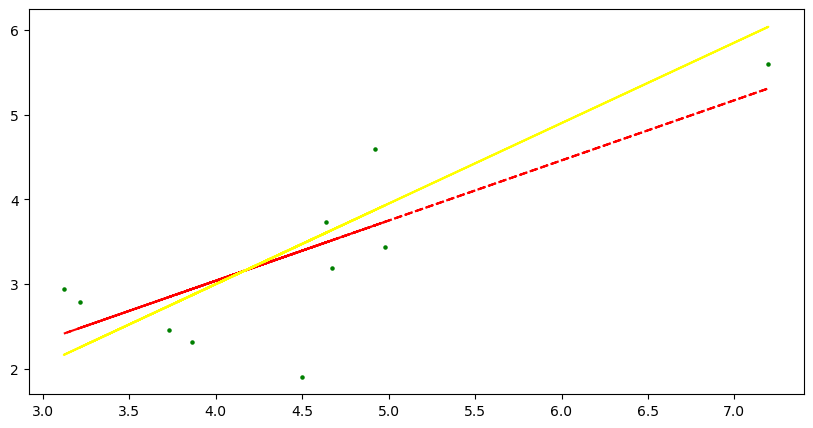

In [8]:
income10 = income[:10]
happiness10 = happiness[:10]
y1 = 0.20 + 0.71*income10 
y3 = -0.8 + 0.95*income10
fig = plt.figure(figsize=(10,5))
plt.scatter(income10, happiness10, s=5, c='g')
plt.plot(income10, y1, '--r')
plt.plot(income10, y3, '-', c='#ffff00')

对于10条数据，可以手动计算并比较误差。 对于海量数据，是不可能的。

可以通过一定的办法来计算出  $b_0$ 和 $b_1$。这个办法是 ： 

## 微积分

我们要最小化的 预测误差是 $ Q = \sum_{i=1}^n(y_i - \hat{y}_i)^2$, 即 $ Q = \sum_{i=1}^n(y_i -（  b_0 + b_1 x_i ）  )^2$

在给定数据的情况下，$ x_i$ 和 $y_i$ 是已知数， $b_0$ 和 $b_1$是未知数， $Q$是关于 $b_0$ 和 $b_1$的 函数，问题转换为 求函数Q的最小值。

函数Q 对 $b_0$ 和$b_1$分别求导数，并令其等于0，可以求得 $b_0$ 和 $b_1$。

公式推导见讲义